**Data Preparation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

X, y = prepare_data('data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)


[624.1, 175.1, 300.5, 78.9]


**Linear Regression Implementation**

In [2]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result


def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss


def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b


y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)
l = compute_loss(y_hat=1, y=0.5)
print(l)
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)


1.0
0.25
-1.0
-3.0
1.000005
0.50001


In [3]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w1, dl_dw1, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return (w1, w2, w3, b, losses)


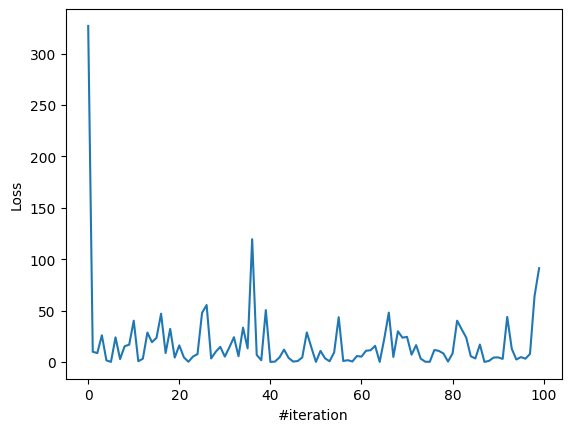

In [5]:
X, y = prepare_data("data/advertising.csv")
w1, w2, w3, b, losses = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [7]:
print(w1, w2, w3)


0.07685205960574645 0.13196079394285865 0.11567005278292652
